In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error

In [34]:
from orbithunter.convolutional_neural_networks import orbit_cnn
from orbithunter.gluing import tile_dictionary_ks

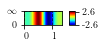

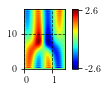

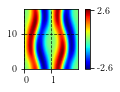

In [3]:
td = tile_dictionary_ks()

td[0].plot()

td[1].plot()

td[2].plot()

tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

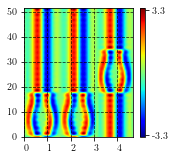

In [4]:
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)
tiling_example = tile(symbol_arrays[57], tile_dictionary, OrbitKS)
tiling_example.plot()

In [5]:
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)

In [6]:
symbol_arrays[57]

array([[0, 0, 0],
       [0, 0, 2],
       [2, 2, 0]])

In [7]:
X = []

for sa in symbol_arrays:
    tiling = tile(sa, td, OrbitKS).reshape(32,32)
    X.append(tiling.state)

In [8]:
from collections import Counter

symbol_y = []
converge_y = []
for sa in symbol_arrays:
    symbol_y.append(sa.ravel().tolist())

In [9]:
np.array(symbol_y).shape, np.array(X).shape

((2176, 9), (2176, 32, 32))

In [10]:
from collections import Counter

counted_symbol_y = []
for sa in symbol_arrays:
    symbol_counter = Counter(sa.ravel().tolist())
    counted_symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])

In [11]:
symbol_array_cnn = orbit_cnn(X, symbol_y, dimension=2, verbose=True, epochs=25) 
cnn, history, ((X_train, y_train), (X_test,  y_test)) = symbol_array_cnn

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1740 samples, validate on 436 samples
Epoch 1/25
1740/1740 [==============================] - 1s 833us/sample - loss: 0.4181 - val_loss: 0.1444
Epoch 2/25
1740/1740 [==============================] - 1s 693us/sample - loss: 0.0658 - val_loss: 0.0239
Epoch 3/25
1740/1740 [==============================] - 1s 698us/sample - loss: 0.0138 - val_loss: 0.0074
Epoch 4/25
1740/1740 [==============================] - 1s 710us/sample - loss: 0.0057 - val_loss: 0.0049
Epoch 5/25
1740/1740 [==============================] - 1s 704us/sample - loss: 0.0041 - val_loss: 0.0038
Epoch 6/25
1740/1740 [==============================] - 1s 697us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 7/25
1740/1740 [==============================] - 1s 695us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 8/25
1740/1740 [==============================] - 1s 686us/sample - loss: 0.0032 - val_

In [12]:
y_predict = cnn.predict(X_test)

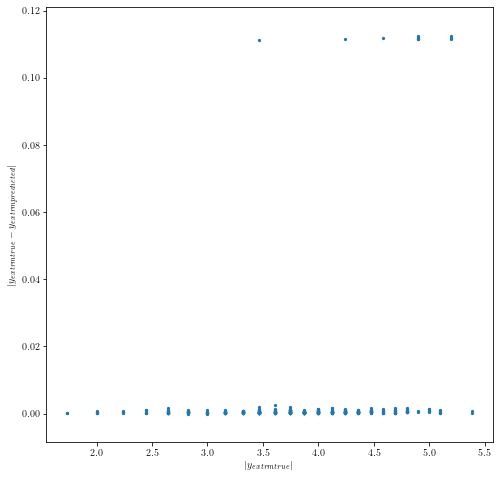

In [13]:
mse_list = []
norm_list = []
for yp, yt in zip(y_predict, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

# y_predict = cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(norm_list, mse_list, s=5)
# _ = ax.plot([0, max(norm_list)],[0, max(norm_list)], color='r')
_ = plt.ylabel('$|y_{\textrm{true}}-y_{\textrm{predicted}}|$')
_ = plt.xlabel('$|y_{\textrm{true}}|$')
_ = plt.show()

In [14]:
y_test[np.where(np.array(mse_list)>0.02)[0]]

array([[1, 1, 2, 1, 2, 2, 2, 2, 1],
       [1, 1, 2, 2, 2, 1, 2, 2, 2],
       [1, 2, 2, 1, 2, 2, 2, 2, 1],
       [1, 1, 2, 2, 2, 1, 1, 2, 2],
       [1, 1, 2, 2, 2, 2, 2, 1, 2],
       [1, 1, 2, 2, 2, 1, 2, 1, 2],
       [1, 1, 2, 1, 2, 2, 2, 1, 2],
       [1, 1, 2, 1, 1, 2, 2, 1, 1],
       [1, 1, 2, 1, 2, 2, 1, 2, 2],
       [1, 1, 2, 1, 1, 2, 2, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 2]])

In [15]:
y_predict[np.where(np.array(mse_list)>0.02)[0]].astype(int)

array([[0, 0, 1, 1, 2, 1, 2, 2, 0],
       [0, 1, 1, 2, 2, 0, 2, 1, 1],
       [0, 1, 1, 1, 2, 1, 2, 2, 0],
       [0, 1, 1, 2, 2, 0, 1, 2, 1],
       [0, 1, 1, 1, 2, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 0, 2, 0, 1],
       [0, 1, 1, 0, 2, 2, 2, 1, 1],
       [0, 1, 1, 0, 1, 2, 2, 1, 0],
       [0, 1, 1, 1, 2, 1, 1, 2, 1],
       [0, 1, 1, 0, 1, 2, 2, 2, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1]])

In [16]:
from sklearn.metrics import explained_variance_score

In [17]:
symbol_count_cnn = orbit_cnn(X, counted_symbol_y, dimension=2, verbose=True, epochs=25) 

Train on 1740 samples, validate on 436 samples
Epoch 1/25
1740/1740 [==============================] - 2s 877us/sample - loss: 5.1203 - val_loss: 4.1973
Epoch 2/25
1740/1740 [==============================] - 1s 712us/sample - loss: 3.9223 - val_loss: 3.7304
Epoch 3/25
1740/1740 [==============================] - 1s 812us/sample - loss: 3.7326 - val_loss: 3.6884
Epoch 4/25
1740/1740 [==============================] - 1s 824us/sample - loss: 3.6980 - val_loss: 3.6652
Epoch 5/25
1740/1740 [==============================] - 1s 766us/sample - loss: 3.6859 - val_loss: 3.6548
Epoch 6/25
1740/1740 [==============================] - 1s 775us/sample - loss: 1.2595 - val_loss: 0.1272
Epoch 7/25
1740/1740 [==============================] - 1s 783us/sample - loss: 0.0538 - val_loss: 0.0169
Epoch 8/25
1740/1740 [==============================] - 1s 766us/sample - loss: 0.0120 - val_loss: 0.0087
Epoch 9/25
1740/1740 [==============================] - 1s 735us/sample - loss: 0.0067 - val_loss: 0.0051

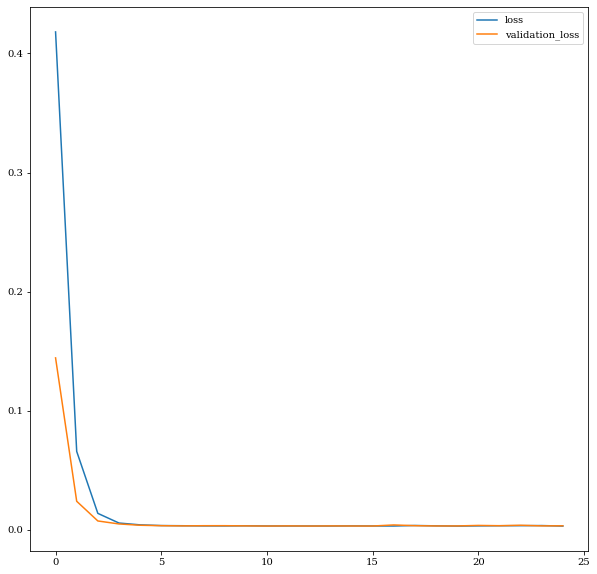

In [18]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(10,10))
_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

In [19]:
cnn, history, ((X_train, y_train), (X_test,  y_test)) = symbol_count_cnn

In [20]:
y_predict_count = cnn.predict(X_test)

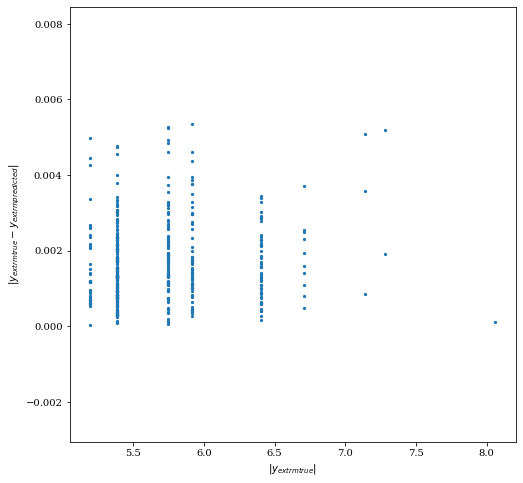

In [21]:
mse_list = []
norm_list = []
for yp, yt in zip(y_predict_count, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

# y_predict = cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(norm_list, mse_list, s=5)
# _ = ax.plot([0, max(norm_list)],[0, max(norm_list)], color='r')
_ = plt.ylabel('$|y_{\textrm{true}}-y_{\textrm{predicted}}|$')
_ = plt.xlabel('$|y_{\textrm{true}}|$')
_ = plt.show()

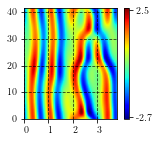

In [22]:
test_orbit = read_h5('OrbitKS_T41p649_L34p029.h5')
test_orbit.plot()

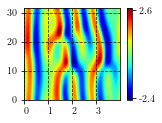

In [23]:
example_orbit_ = read_h5('OrbitKS_T31p619_L35p379.h5')
example_orbit_.plot()
example_orbit_ = rediscretize(example_orbit_, new_shape=(32,32))

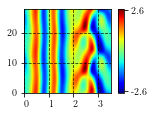

In [24]:
test_orbit = read_h5('OrbitKS_T28p080_L31p418.h5').reshape(32,32)
test_orbit.plot()

In [25]:
mse_list = []
norm_list = []
for yp, yt in zip(y_predict_count, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

Example L: 31.418708434397303 Sum_L for Tiles 42.610578406185695


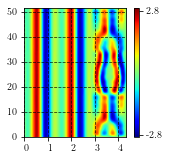

In [26]:
print('Example L:', test_orbit.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)
guess_symbol_array = np.array([[0,0, 1],[0, 0, 2],[0,0,1]])
approximate_tiling = tile(guess_symbol_array, td, OrbitKS).reshape(32, 32)
approximate_tiling.plot()

In [27]:
cnn.predict(test_orbit.convert(to='field').state.reshape(1, 32, 32, 1)).astype(int)

array([[0, 5, 6]])

In [28]:
from sklearn.metrics import mean_squared_error

y_predict = cnn.predict(X_test)
mse_array = mean_squared_error(y_test, y_predict)

In [29]:
y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = y_bottleneck

In [30]:
bottleneck_cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2, epochs=25, verbose=True) 

Train on 1740 samples, validate on 436 samples
Epoch 1/25
1740/1740 [==============================] - 1s 847us/sample - loss: 0.1353 - val_loss: 0.0152
Epoch 2/25
1740/1740 [==============================] - 1s 695us/sample - loss: 0.0135 - val_loss: 0.0101
Epoch 3/25
1740/1740 [==============================] - 1s 727us/sample - loss: 0.0114 - val_loss: 0.0101
Epoch 4/25
1740/1740 [==============================] - 1s 699us/sample - loss: 0.0116 - val_loss: 0.0130
Epoch 5/25
1740/1740 [==============================] - 1s 677us/sample - loss: 0.0114 - val_loss: 0.0092
Epoch 6/25
1740/1740 [==============================] - 1s 707us/sample - loss: 0.0104 - val_loss: 0.0088
Epoch 7/25
1740/1740 [==============================] - 1s 721us/sample - loss: 0.0111 - val_loss: 0.0094
Epoch 8/25
1740/1740 [==============================] - 1s 693us/sample - loss: 0.0105 - val_loss: 0.0103
Epoch 9/25
1740/1740 [==============================] - 1s 692us/sample - loss: 0.0102 - val_loss: 0.0085

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

In [32]:
bottleneck_cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

array([[1.2543365]], dtype=float32)

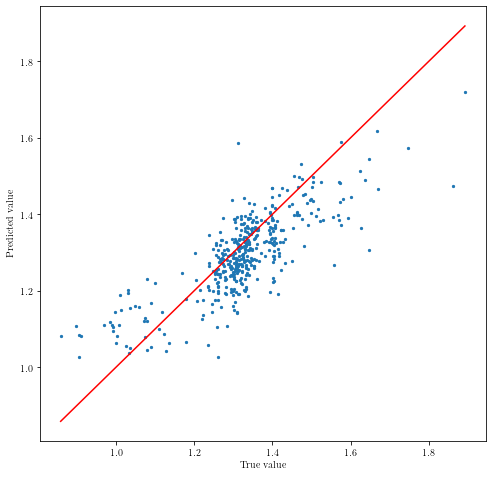

In [33]:
y_predict = bottleneck_cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([y_test.min()-0.001,y_test.max()],[y_test.min()-0.001,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()